# Reinforcement Learning : 

  - Create an Environment (either from preinstalled libraries or from scratch)
  - Use the default or customize your environment (Setting different values of rewards , policies etc)
  - Create your agent or bots (you can have more than 1 agent for a games like chess , just like 2 players with different startegies are playing)


#### Some other libraries(APIs) with chess environment : 

  - pettingzoo
  - chessnut (itself)
  - stockfish 
  - chess (python chess)
  - gym_chess (gym)  etc 

In this notebook since kaggle has their own library for chess environment.

Also note you need to understand some basics like uci notation that are used in chess engines if you use APIs to create the strategies.

Basics for all chess engines : FEN strings , UCI notation

In [ ]:
%pip install --upgrade kaggle-environments
%pip install chess

In [ ]:
from kaggle_environments import make

In [ ]:
env = make('chess' , debug=True)

In [ ]:
result = env.run(["random", "random"]) ## Random agent vs Random Agent
env.render(mode="ipython", width=500, height=500) 

In [ ]:
env.configuration

In [ ]:
env.specification

In [ ]:
env.specification.reward

In [ ]:
env.specification.action

In [ ]:
env.specification.observation

In [ ]:
from Chessnut import Game 
import random


Reading uci notation : 

- e7e8 (Normal) 
- e7e8q (for promotion)

UCI notation is also known as long algebric notation

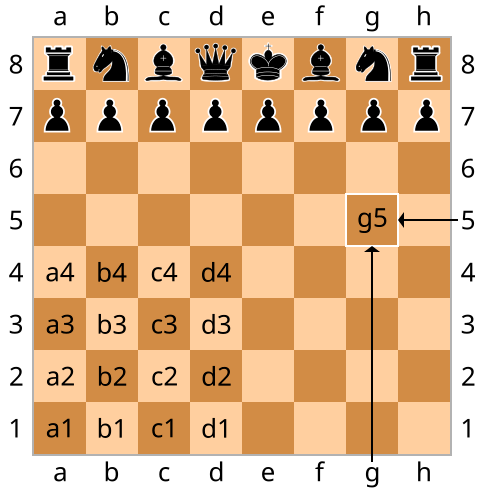
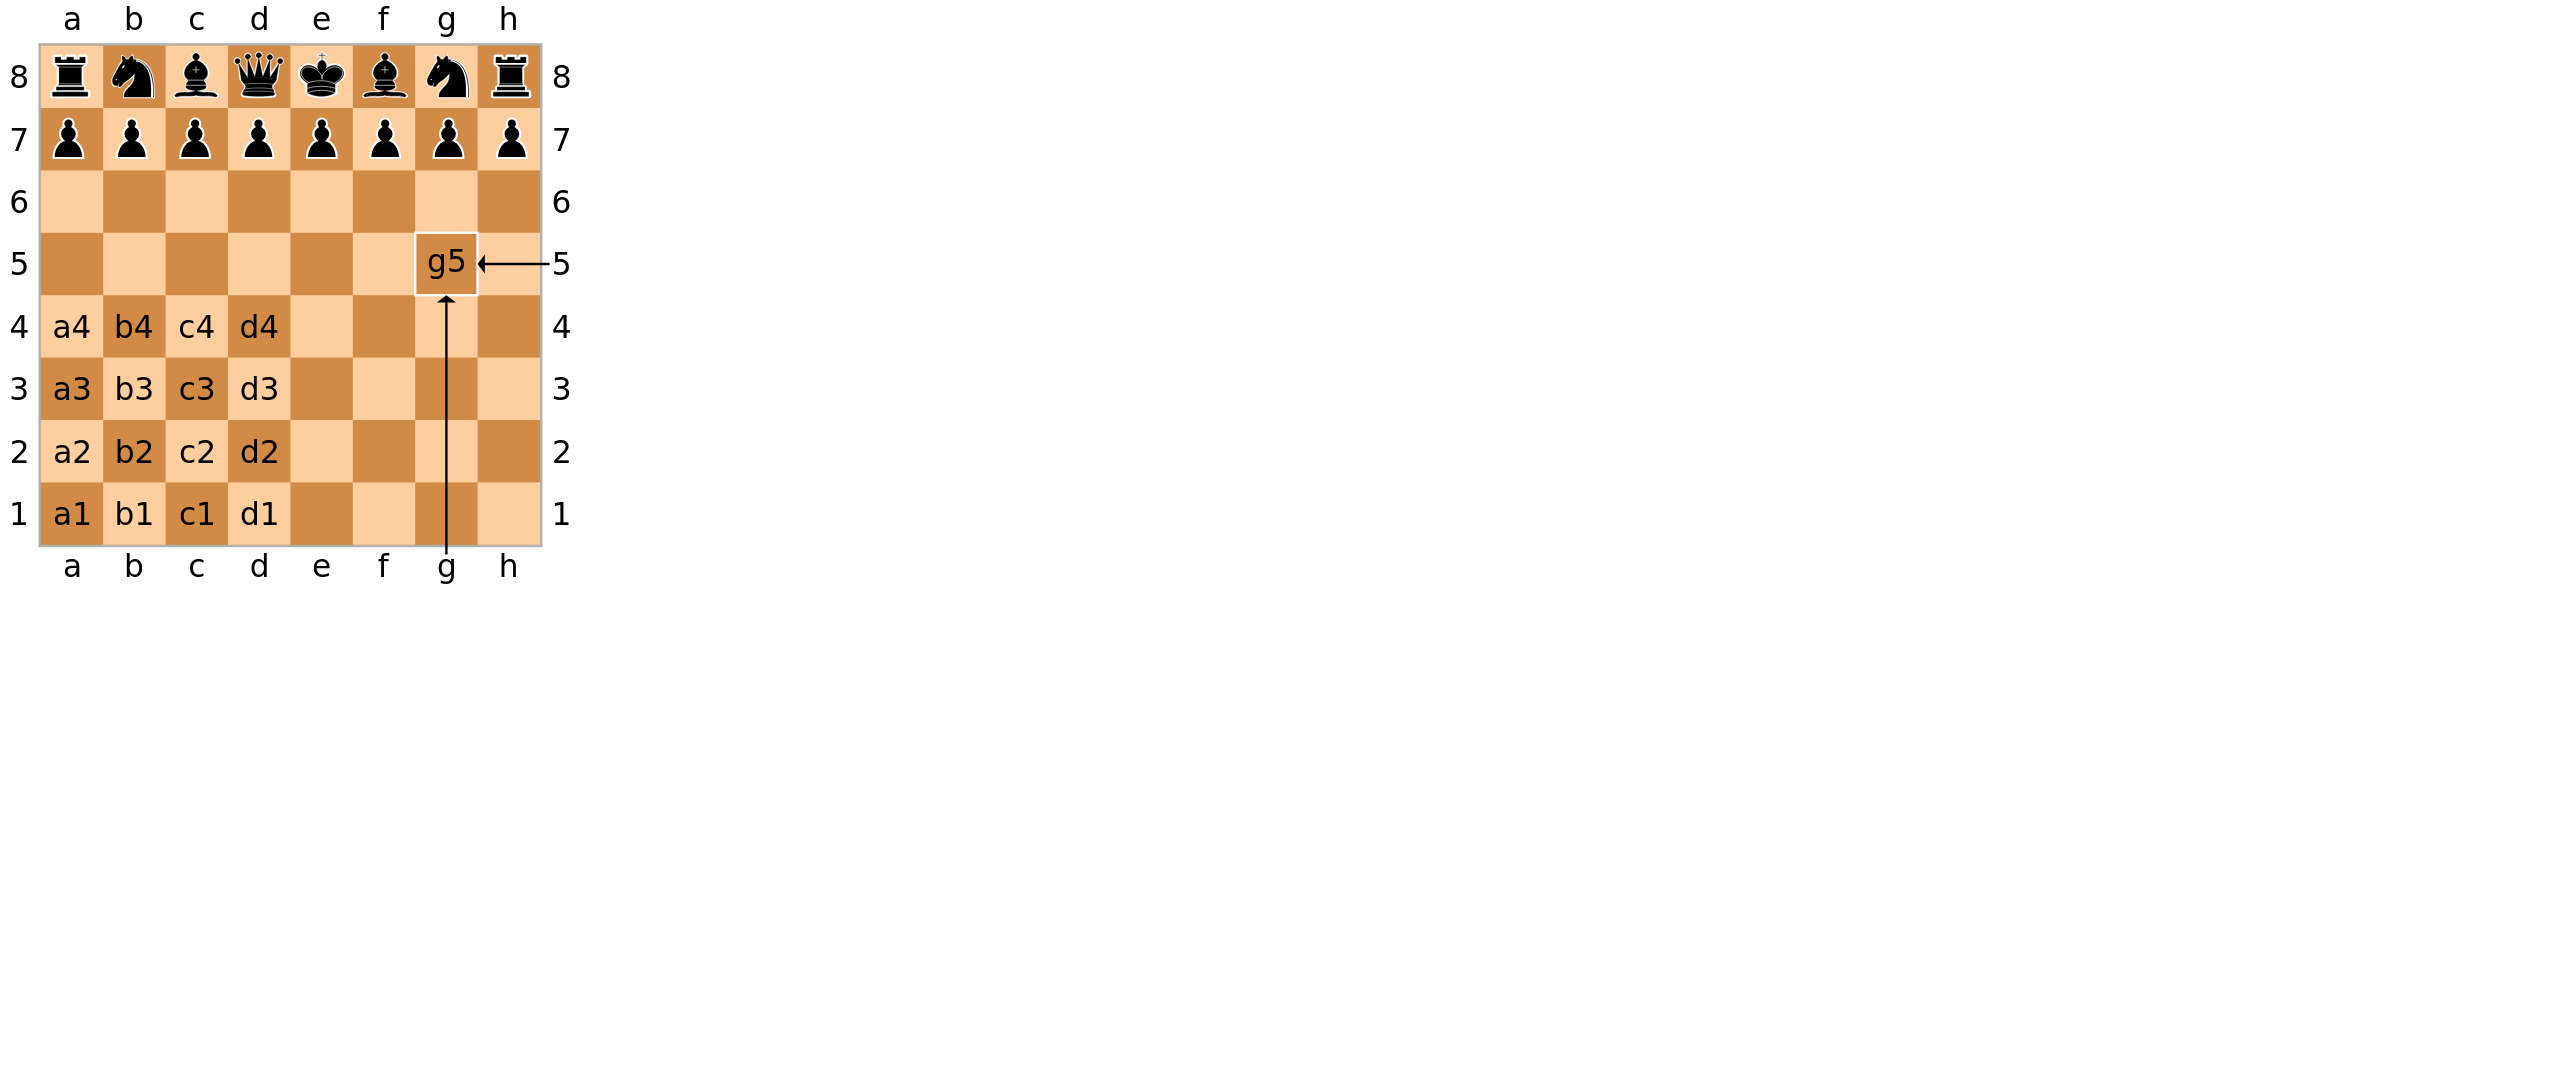
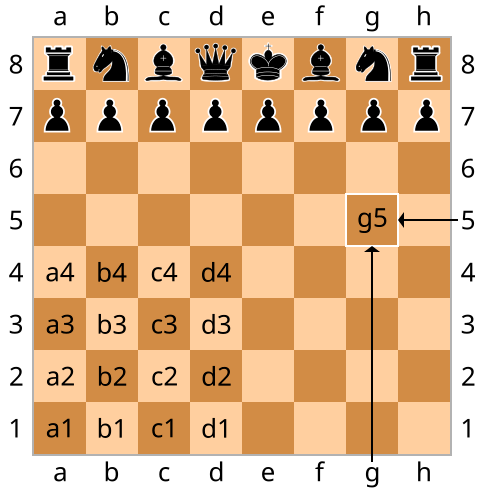

Reference : [https://github.com/cgearhart/Chessnut/blob/master/Chessnut/game.py](http://)

Game.xy2i converts a numerical index to board index

In [ ]:
def my_agent(obs):

    game = Game(fen=obs.board)
    actions = list(game.get_moves())

    ## any action can Checkmate or not
    for move in actions:
        g = Game(obs.board)
        g.apply_move(move)
        if g.status == Game.CHECKMATE:
            return move

    ## any action can capture a piece or not
        move_to_this_pos = move[2:4] ## the piece is moved from initial pos to final pos (uci = a1b2) , b2 = move_to_pos
        if game.board.get_piece(Game.xy2i(move_to_this_pos)) != ' ':
              return move

    ## any action can promote
        if "q" in move.lower():  ## if any action has a queen piece [does depend on playing white or black? no]
            return move  ## need to understand how to read uci
          
    ## if none of the senarios choose random action
    return random.choice(actions) 

In [ ]:
result = env.run([my_agent, "random"]) ## my agent is playing white 
env.render(mode="ipython", width=500, height=500) 

In [ ]:
final_state_white=result[-1][0]
final_state_black=result[-1][1]

In [ ]:
final_state_white

In [ ]:
final_state_white.keys()

In [ ]:
final_fen=final_state_white['observation']['board']

In [ ]:
import chess

end_game = chess.Board(final_fen)

print("My Agent Checkmate the opponent : ",end_game.is_checkmate())

print("Outcome of Game : " , end_game.outcome())

### Acknowledgements : 

I have taken bits and pieces form way many various sources along with APIs and also had few of my own inputs , to prepare myself a tutorial for a very basic and complete beginner in Reinforcement Learning like myself. I have structured the code myself ,so anyone beginning with RL can follow along. 

Please feel free to give feedback , would really appreciate it. 

Thank you for your attention , if you are still reading this. 